# **Data Preprocessing**

In [12]:
import pandas as pd

# Read the historic data
historic_data = pd.read_csv('/content/sample_data/historic.csv')
prediction_input_data = pd.read_csv('/content/sample_data/prediction_input.csv')
# Drop unnecessary columns if they exist
if 'item_no' in historic_data.columns:
    historic_data.drop('item_no', axis=1, inplace=True)

if 'item_no' in prediction_input_data.columns:
    prediction_input_data.drop('item_no', axis=1, inplace=True)

# One-hot encoding for categorical variables
historic_data = pd.get_dummies(historic_data, columns=['category', 'main_promotion', 'color'])
prediction_input_data = pd.get_dummies(prediction_input_data, columns=['category', 'main_promotion', 'color'])



In [13]:

from sklearn.model_selection import train_test_split


# Splitting historic data into features (X) and target labels (y)
X = historic_data.drop('success_indicator', axis=1)
y = historic_data['success_indicator']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Tunned SVM model**

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf']   # Kernel type
}

# Initialize SVM classifier
svm_model = SVC()

# Initialize GridSearchCV with SVM classifier and parameter grid
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predictions on the testing set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy_svm_tuned = accuracy_score(y_test, y_pred)
precision_svm_tuned = precision_score(y_test, y_pred, pos_label='top')
recall_svm_tuned = recall_score(y_test, y_pred, pos_label='top')
f1_svm_tuned = f1_score(y_test, y_pred, pos_label='top')

print("Accuracy of tuned SVM model:", accuracy_svm_tuned)
print("Precision:", precision_svm_tuned)
print("Recall:", recall_svm_tuned)
print("F1 Score:", f1_svm_tuned)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy of tuned SVM model: 0.846875
Precision: 0.85
Recall: 0.9251700680272109
F1 Score: 0.8859934853420196


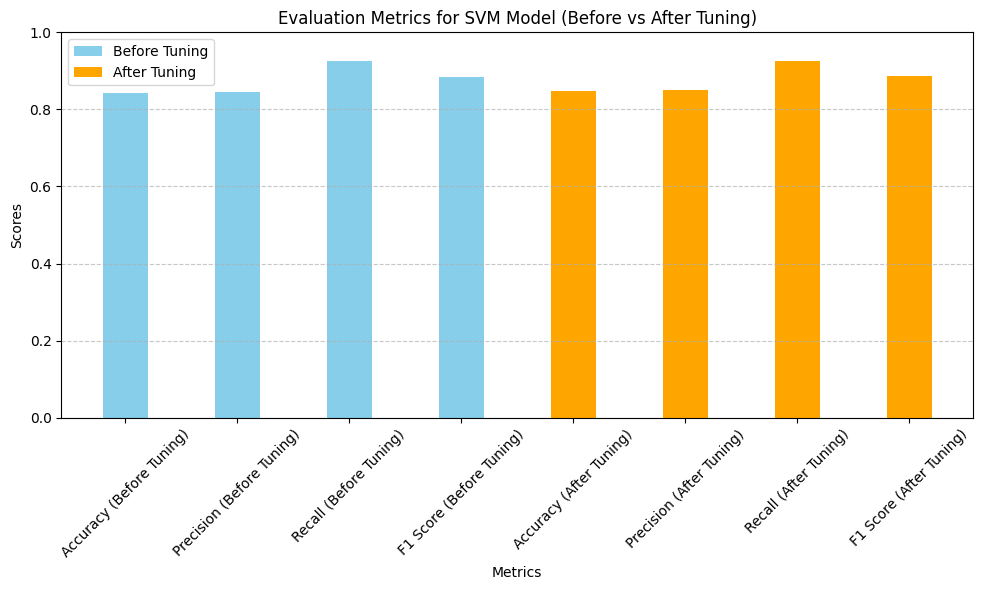

In [8]:
import matplotlib.pyplot as plt

# Define evaluation metrics and their corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_before_tuning = [accuracy_svm, precision_svm, recall_svm, f1_svm]
scores_after_tuning = [accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, f1_svm_tuned]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting scores before tuning
plt.bar([metric + ' (Before Tuning)' for metric in metrics], scores_before_tuning, color='skyblue', width=0.4, label='Before Tuning')

# Plotting scores after tuning
plt.bar([metric + ' (After Tuning)' for metric in metrics], scores_after_tuning, color='orange', width=0.4, label='After Tuning')

plt.title('Evaluation Metrics for SVM Model (Before vs After Tuning)')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limit to ensure all scores are visible
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **SVM Model**

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

# Specify 'top' as the positive label
pos_label = 'top'

# Calculate precision
precision_svm = precision_score(y_test, y_pred, pos_label=pos_label)

# Calculate recall
recall_svm = recall_score(y_test, y_pred, pos_label=pos_label)

# Calculate F1 score
f1_svm = f1_score(y_test, y_pred, pos_label=pos_label)

print("Accuracy of SVM model:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


Accuracy of SVM model: 0.843125
Precision: 0.8454706927175843
Recall: 0.9251700680272109
F1 Score: 0.8835266821345708


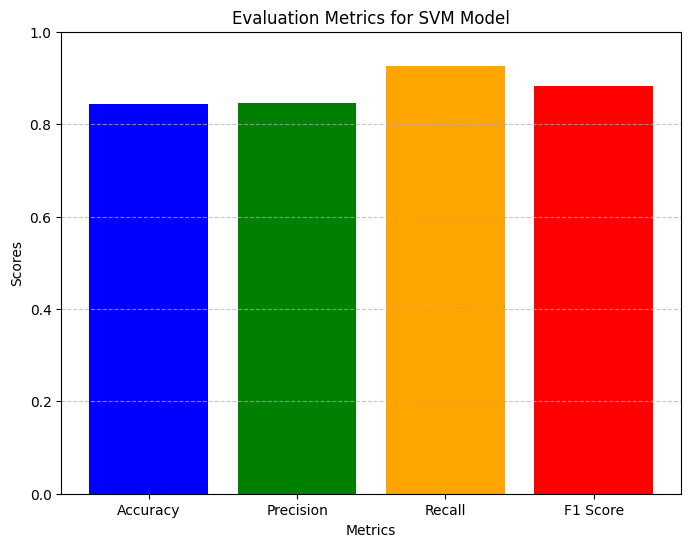

In [6]:
import matplotlib.pyplot as plt

# Define evaluation metrics and their corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_svm, precision_svm, recall_svm, f1_svm]

# Plotting
plt.figure(figsize=(8, 6))

plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Evaluation Metrics for SVM Model')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limit to ensure all scores are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **XGBoost model**

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert string labels to integers
y_train_int = y_train.replace({'flop': 0, 'top': 1})
y_test_int = y_test.replace({'flop': 0, 'top': 1})

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train_int)

# Predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_int, y_pred)

# Calculate precision
precision_xgb = precision_score(y_test_int, y_pred)

# Calculate recall
recall_xgb = recall_score(y_test_int, y_pred)

# Calculate F1 score
f1_xgb = f1_score(y_test_int, y_pred)

print("Accuracy of XGBoost model:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


Accuracy of XGBoost model: 0.84
Precision: 0.8510445049954587
Recall: 0.9105928085519922
F1 Score: 0.8798122065727698


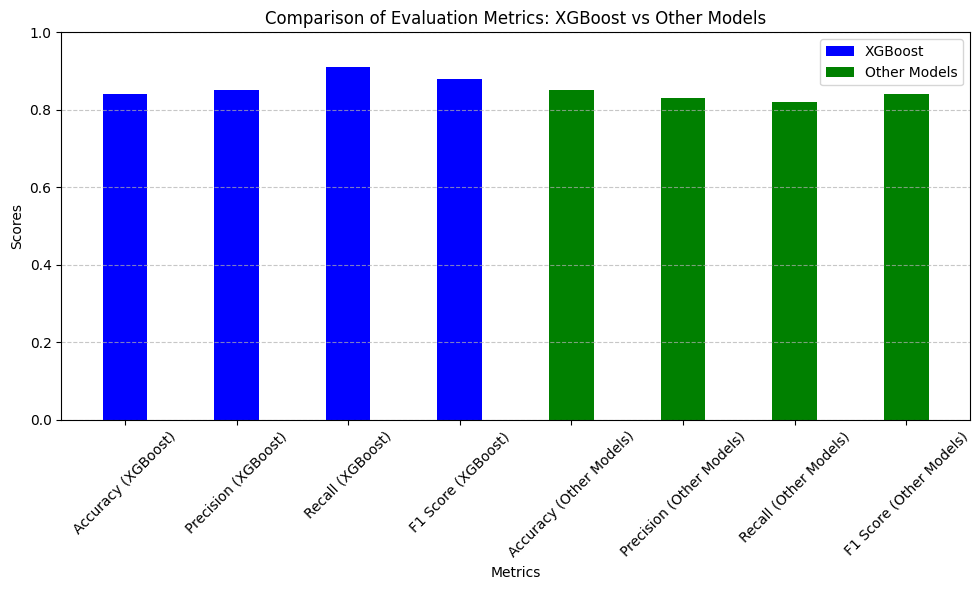

In [10]:
import matplotlib.pyplot as plt

# Define evaluation metrics and their corresponding scores for XGBoost
metrics_xgb = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_xgb = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

# Define evaluation metrics and their corresponding scores for other models
# Replace placeholders with actual scores for other models
metrics_other = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_other = [0.85, 0.83, 0.82, 0.84]  # Replace with actual scores for other models

# Plotting
plt.figure(figsize=(10, 6))

# Plot XGBoost scores
plt.bar([metric + ' (XGBoost)' for metric in metrics_xgb], scores_xgb, color='blue', width=0.4, label='XGBoost')

# Plot other models' scores
plt.bar([metric + ' (Other Models)' for metric in metrics_other], scores_other, color='green', width=0.4, label='Other Models')

plt.title('Comparison of Evaluation Metrics: XGBoost vs Other Models')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limit to ensure all scores are visible
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rfm = accuracy_score(y_test, y_pred)

# Specify 'top' as the positive label
pos_label = 'top'

# Calculate precision
precision_rfm = precision_score(y_test, y_pred, pos_label=pos_label)

# Calculate recall
recall_rfm = recall_score(y_test, y_pred, pos_label=pos_label)

# Calculate F1 score
f1_rfm = f1_score(y_test, y_pred, pos_label=pos_label)

print("Accuracy of Random Forest model:", accuracy_rfm)
print("Precision:", precision_rfm)
print("Recall:", recall_rfm)
print("F1 Score:", f1_rfm)


Accuracy of Random Forest model: 0.82375
Precision: 0.8392370572207084
Recall: 0.8979591836734694
F1 Score: 0.8676056338028169


# **logistic regression model**

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Splitting historic data into features (X) and target labels (y)
X = historic_data.drop('success_indicator', axis=1)
y = historic_data['success_indicator']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Evaluate the model
accuracy_logistic = logistic_model.score(X_test, y_test)


# Predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Specify the positive label as 'top'
pos_label = 'top'

# Calculate precision
precision_logistic = precision_score(y_test, y_pred, pos_label=pos_label)

# Calculate recall
recall_logistic = recall_score(y_test, y_pred, pos_label=pos_label)

# Calculate F1 score
f1_logistic = f1_score(y_test, y_pred, pos_label=pos_label)


print("Accuracy of logistic regression model:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)


Accuracy of logistic regression model: 0.818125
Precision: 0.8265486725663717
Recall: 0.9076773566569485
F1 Score: 0.8652153774895784


# **ANN**

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions on the testing set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy_ann = accuracy_score(y_test, y_pred)

# Specify 'top' as the positive label
pos_label = 1  # Assuming 'top' is encoded as 1

# Calculate precision
precision_ann = precision_score(y_test, y_pred, pos_label=pos_label)

# Calculate recall
recall_ann = recall_score(y_test, y_pred, pos_label=pos_label)

# Calculate F1 score
f1_ann = f1_score(y_test, y_pred, pos_label=pos_label)

print("Accuracy of ANN model:", accuracy_ann)
print("Precision:", precision_ann)
print("Recall:", recall_ann)
print("F1 Score:", f1_ann)


Epoch 1/10
160/160 [==============================] - 4s 12ms/step - loss: 0.5291 - accuracy: 0.7332 - val_loss: 0.4650 - val_accuracy: 0.8219
Epoch 2/10
160/160 [==============================] - 1s 7ms/step - loss: 0.4382 - accuracy: 0.8359 - val_loss: 0.4309 - val_accuracy: 0.8391
Epoch 3/10
160/160 [==============================] - 1s 7ms/step - loss: 0.4199 - accuracy: 0.8469 - val_loss: 0.4266 - val_accuracy: 0.8406
Epoch 4/10
160/160 [==============================] - 1s 7ms/step - loss: 0.4137 - accuracy: 0.8486 - val_loss: 0.4172 - val_accuracy: 0.8492
Epoch 5/10
160/160 [==============================] - 1s 6ms/step - loss: 0.4105 - accuracy: 0.8480 - val_loss: 0.4080 - val_accuracy: 0.8438
Epoch 6/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4049 - accuracy: 0.8510 - val_loss: 0.4251 - val_accuracy: 0.8242
Epoch 7/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4017 - accuracy: 0.8557 - val_loss: 0.4087 - val_accuracy: 0.8453
Epoch

# **Model Analysis**

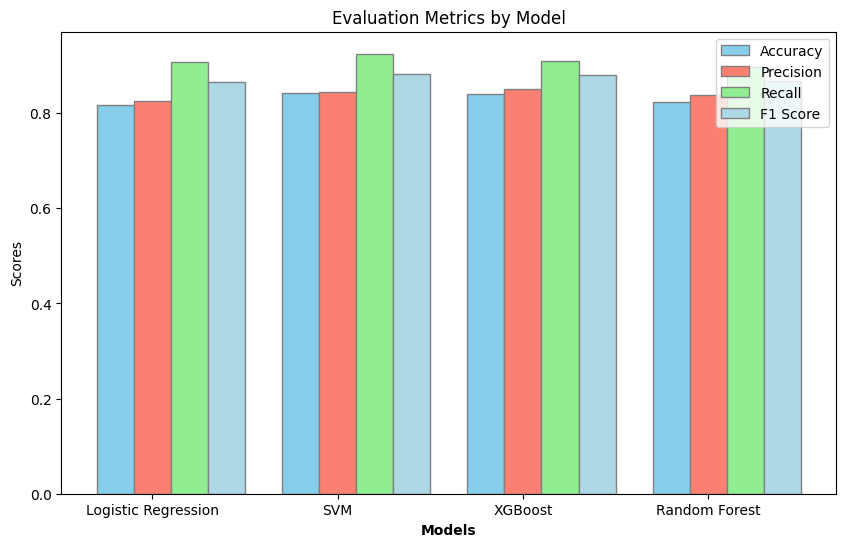

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding evaluation metrics
models = ['Logistic Regression', 'SVM', 'XGBoost', 'Random Forest']

# Dummy evaluation metric values (replace these with actual values)
accuracies = [accuracy_logistic, accuracy_svm, accuracy_xgb, accuracy_rfm]
precisions = [precision_logistic, precision_svm, precision_xgb, precision_rfm]
recalls = [recall_logistic, recall_svm, recall_xgb, recall_rfm]
f1_scores = [f1_logistic, f1_svm, f1_xgb, f1_rfm]

# Set the number of evaluation metrics
num_metrics = 4

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precisions, color='salmon', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recalls, color='lightgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='lightblue', width=bar_width, edgecolor='grey', label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add labels and title
plt.ylabel('Scores')
plt.title('Evaluation Metrics by Model')

# Add legend
plt.legend()

# Show plot
plt.show()
